In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame([[165,137,472,192],[101,92,250,144],[29,127,201,91]],columns=['R&D','Ops','Marketing','Profit'])
df

,R&D,Ops,Marketing,Profit
0,165,137,472,192
1,101,92,250,144
2,29,127,201,91


In [5]:
# create f0(x) function
df["f0(x)"] = df["Profit"].mean()
df

,R&D,Ops,Marketing,Profit,f0(x)
0,165,137,472,192,142.333333
1,101,92,250,144,142.333333
2,29,127,201,91,142.333333


In [8]:
# create r1 profit -f0(x) which is like a errors
df["r1"] = df["Profit"] - df["f0(x)"]
df

,R&D,Ops,Marketing,Profit,f0(x),r1
0,165,137,472,192,142.333333,49.666667
1,101,92,250,144,142.333333,1.666667
2,29,127,201,91,142.333333,-51.333333


In [18]:
# plot decesion tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 3)
dt.fit(df.iloc[:,:3].values,df.iloc[:,-1])

DecisionTreeRegressor(max_depth=3)

[Text(0.4, 0.8333333333333334, 'x[2] <= 225.5\nsquared_error = 1701.556\nsamples = 3\nvalue = -0.0'),
 Text(0.2, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = -51.333'),
 Text(0.6, 0.5, 'x[0] <= 133.0\nsquared_error = 576.0\nsamples = 2\nvalue = 25.667'),
 Text(0.4, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 1.667'),
 Text(0.8, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 49.667')]

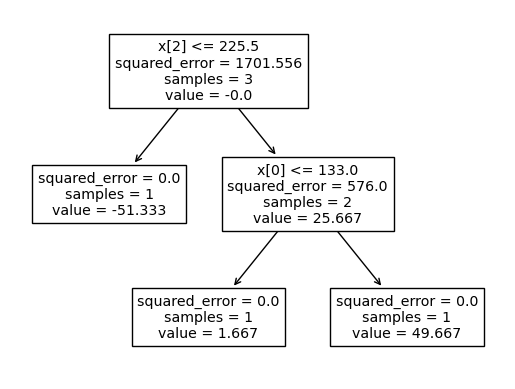

In [19]:
from sklearn.tree import plot_tree
plot_tree(dt)

##now work on another dataset


In [20]:
import matplotlib.pyplot as plt

In [21]:
np.random.seed(42)

In [22]:
X = np.random.rand(100,1) - 0.5
y = 3*X[:,0]**2 + 0.05*np.random.randn(100)

In [26]:
# create a dataframe
df = pd.DataFrame()

df["X"] = X.reshape(100)
df["y"] = y
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


Text(0.5, 1.0, 'X vs y')

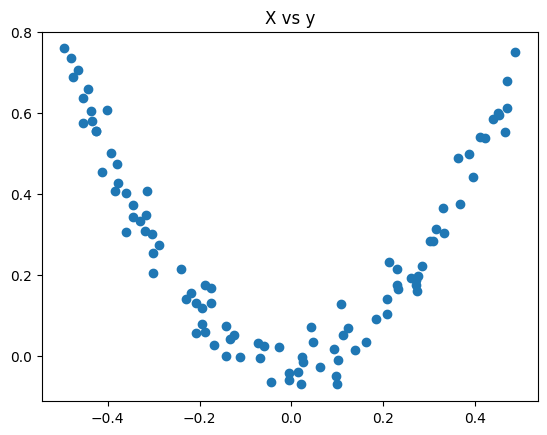

In [28]:
# plot scatter plot
plt.scatter(df["X"],df["y"])
plt.title("X vs y")

In [31]:
# create a predict 1
df["pred_1"] = df["y"].mean()
df.head()

,X,y,pred_1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458


In [33]:
# now calculate r1
df["r1"] = df["y"] - df["pred_1"]
df.head()

,X,y,pred_1,r1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528


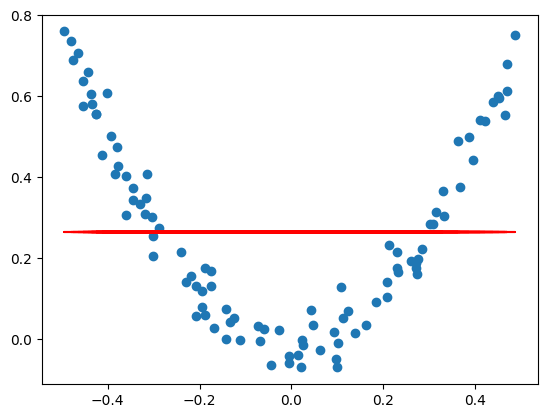

In [36]:
plt.scatter(df["X"],df["y"])
plt.plot(df["X"],df["pred_1"],color = "red")

In [41]:
tree1 = DecisionTreeRegressor(max_depth=3)
tree1.fit(df["X"].values.reshape(100,1),df["r1"].values)

DecisionTreeRegressor(max_depth=3)

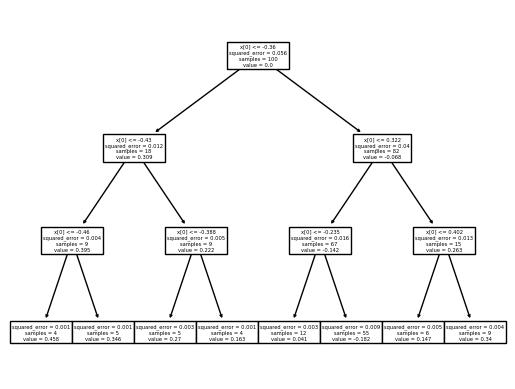

In [42]:
plot_tree(tree1)
plt.show()

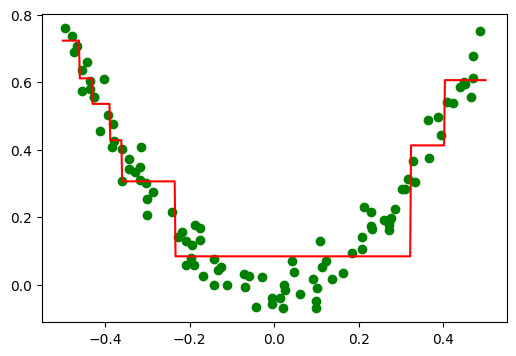

In [52]:
# create x test
x_test = np.linspace(-0.5,0.5,500)
y_pred = 0.265458 + tree1.predict(x_test.reshape(500,1))


# plot the figure

plt.figure(figsize=(6,4))

plt.plot(x_test,y_pred,color = "red")
plt.scatter(df["X"],df["y"],color = "green")

In [54]:
# make prediction 2 column and result 2 column
df["pred2"] = 0.265458 + tree1.predict(df["X"].values.reshape(100,1))
df["r2"] = df["y"] - df["pred2"]
df

,X,y,pred_1,r1,pred2,r2
0,-0.125460,0.051573,0.265458,-0.213885,0.083770,-0.032197
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.083770,0.082282
3,0.098658,-0.070178,0.265458,-0.335636,0.083770,-0.153948
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.083770,-0.124445
96,0.022733,-0.002305,0.265458,-0.267763,0.083770,-0.086074
97,-0.072459,0.032809,0.265458,-0.232650,0.083770,-0.050961
98,-0.474581,0.689516,0.265458,0.424057,0.722987,-0.033471


In [55]:
# now fit in second decision tree
tree2 = DecisionTreeRegressor(max_leaf_nodes = 8)
tree2.fit(df["X"].values.reshape(100,1),df["r2"].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [56]:
 y_pred2 = 0.265458 + sum(regressor.predict(x_test.reshape(-1, 1)) for regressor in [tree1,tree2])

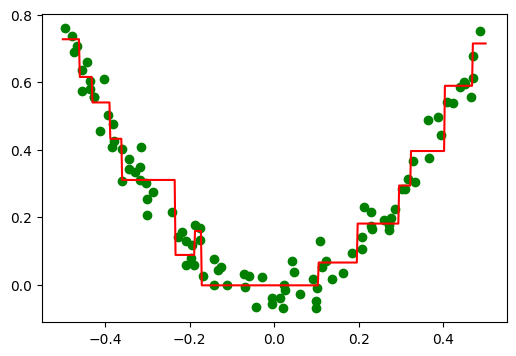

In [57]:
# now again plot the graph
plt.figure(figsize=(6,4))

plt.plot(x_test,y_pred2,color = "red")
plt.scatter(df["X"],df["y"],color = "green")

In [62]:
def gradient_bosting(X,y,number,lr,count = 1,regs = [],foo=None):
    if number == 1:
        return
    else:
        # do bosting
        if count>1:
            y = y-regs[-1].predict(X)
        else:
            foo = y
        tree_regs = DecisionTreeRegressor(max_depth = 5, random_state = 42)
        tree_regs.fit(X,y)

        regs.append(tree_regs)

        x1 = np.linspace(-0.5,0.5,500)
        y_pred = sum(regressor.predict(x1.reshape(-1,1)) for regressor in regs)

        # now plot the graph
        plt.figure()
        plt.plot(x1,y_pred,color = "green")
        plt.plot(X[:,0],foo,"r.")
        plt.show()

        gradient_bosting(X,y,number-1,lr,count+1,regs,foo=foo)

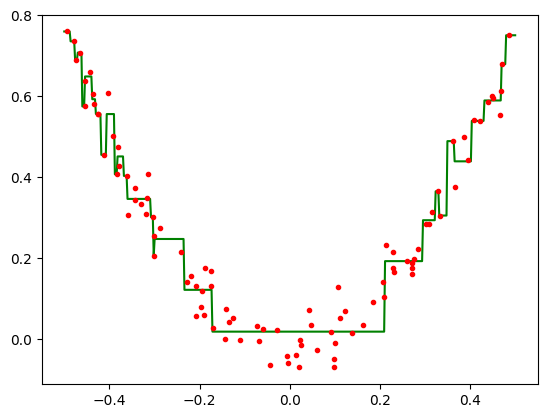

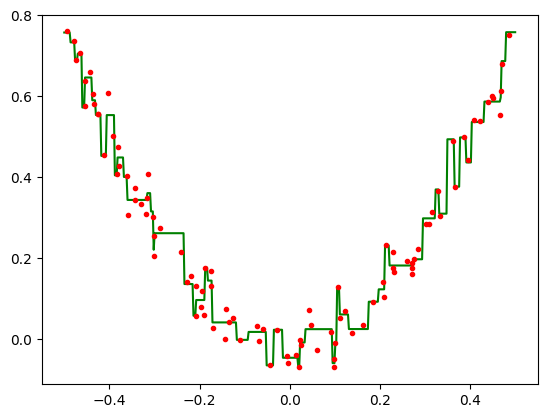

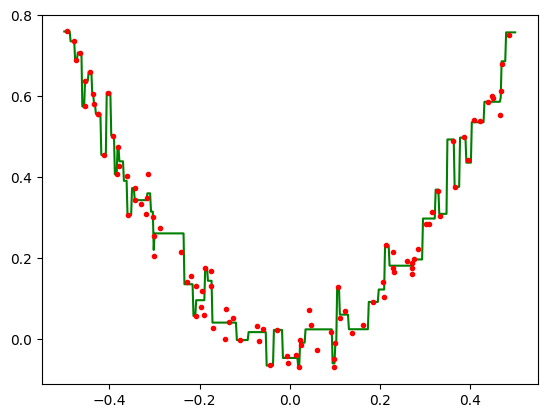

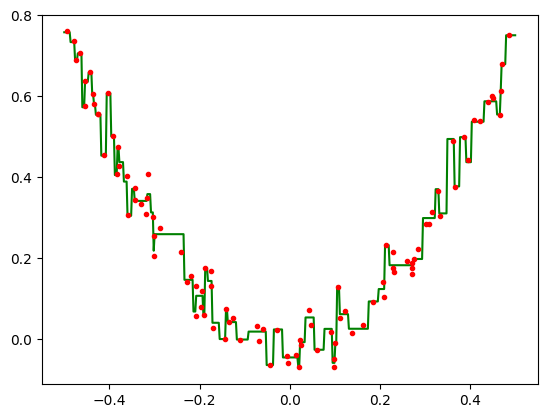

In [63]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_bosting(X,y,5,lr=1)